<a href="https://colab.research.google.com/github/camilagonzalezquevedo/Tarea_2_Mec_Estadist/blob/main/P1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def markov_pi(N, delta):
    N_hits = 0
    x, y = 1.0, 1.0
    rejections = 0

    for i in range(N):
        dx, dy = np.random.uniform(-delta, delta), np.random.uniform(-delta, delta)
        x_new, y_new = x + dx, y + dy

        if abs(x_new) <= 1 and abs(y_new) <= 1:
            x, y = x_new, y_new
            if x**2 + y**2 <= 1:
                N_hits += 1
        else:
            rejections += 1

    rejection_rate = rejections / N
    return N_hits / N, rejection_rate


In [ ]:
N_values = [10, 100, 1000, 10000, 100000, 1000000]
deviations_std = []

for N in N_values:
  deviations = []
  for i in range(20):
    N_hits, rejection_rate = markov_pi(N, 0.3)
    deviation = (N_hits/N - np.pi/4)**2
    deviations.append(deviation)

  std_dev = np.sqrt(np.mean(deviations))
  deviations_std.append(std_dev)

In [ ]:
#para N^5
N = 1000000
delta_values = np.linspace(0.1, 3.0, 30)
pi_estimates = []
rejection_rates = []
deviations_std = []

for delta in delta_values:
  deviations = []
  temp_deviations = []
  for i in range(20):
    N_hits, rejection_rate = markov_pi(N, delta)
    deviation = (N_hits/N - np.pi/4)**2
    deviations.append(deviation)
    temp_deviations.append(deviation)

  std_dev = np.sqrt(np.mean(deviations))
  deviations_std.append(std_dev)
  rejection_rates.append(rejection_rate)

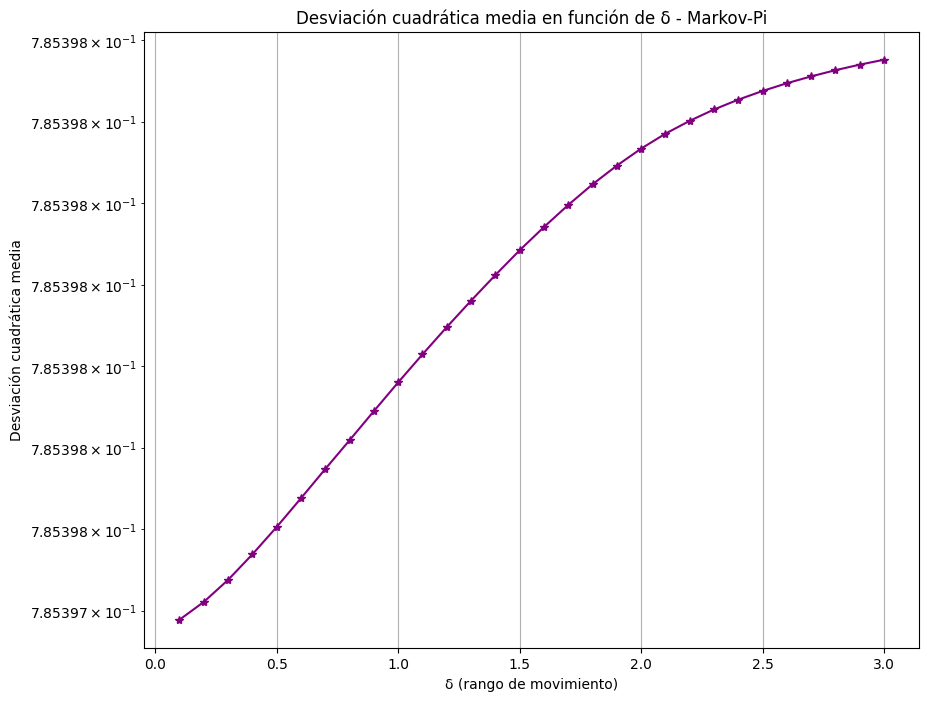

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(delta_values, deviations_std, marker='*', color='purple')
plt.xlabel('δ (rango de movimiento)')
plt.ylabel('Desviación cuadrática media')
plt.yscale('log')
plt.title('Desviación cuadrática media en función de δ - Markov-Pi')
plt.grid(True)
plt.show()

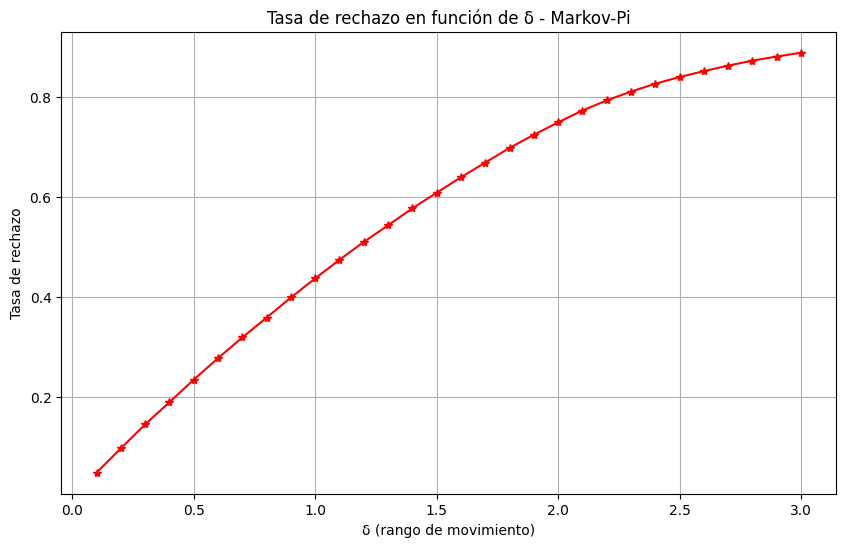

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(delta_values, rejection_rates, marker='*', color='red')
plt.xlabel('δ (rango de movimiento)')
plt.ylabel('Tasa de rechazo')
plt.title('Tasa de rechazo en función de δ - Markov-Pi')
plt.grid(True)
plt.show()